In [1]:
import pandas as pd
bnb=pd.read_csv('AB_NYC_2019.csv')
bnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# 1.DISTRIBUTION OF LISTINGS BY BOROUGH

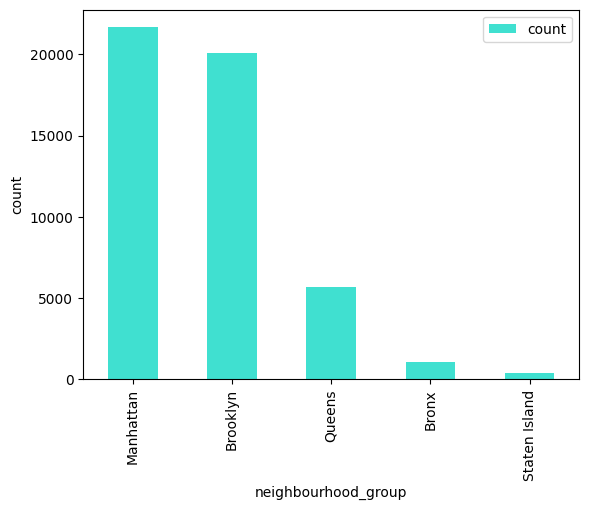

In [2]:
import matplotlib.pyplot as plt
bor_count=bnb['neighbourhood_group'].value_counts().reset_index()
bor_count.plot(kind='bar',x='neighbourhood_group',y='count',color='turquoise')
plt.ylabel('count')
plt.show()

# 2.WHAT IS THE AVERAGE PRICE OF LISTINGS IN EACH BOROUGH?

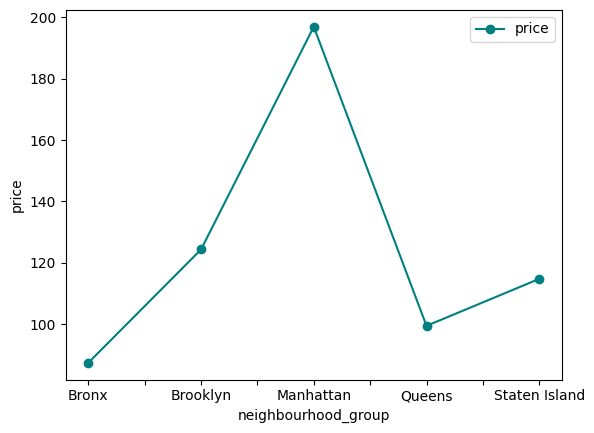

In [3]:
avg_price=bnb.groupby(['neighbourhood_group'])['price'].mean().reset_index()
avg_price.plot(kind='line',x='neighbourhood_group',y='price',color='teal',marker='o')
plt.ylabel('price')
plt.show()

# 3.WHICH ROOM TYPE IS MOST COMMON IN EACH BOROUGH?

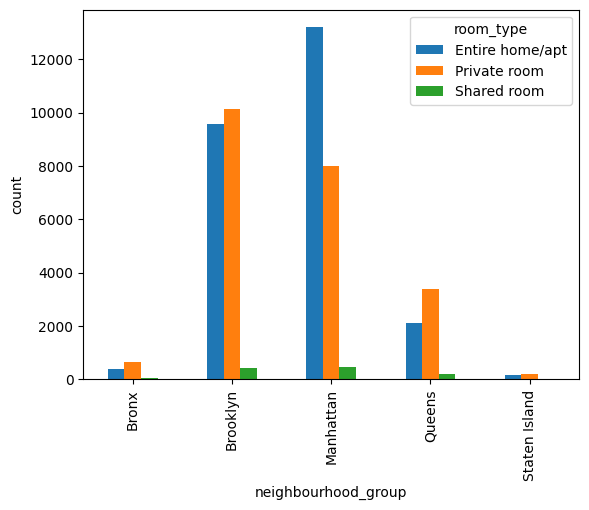

In [4]:
com_borough=bnb.groupby(['neighbourhood_group','room_type']).size().unstack()
com_borough.plot(kind='bar')
plt.ylabel('count')
plt.show()

# 4.WHAT IS THE AVAILABILITY TREND FOR LISTINGS PRICED ABOVE $500?

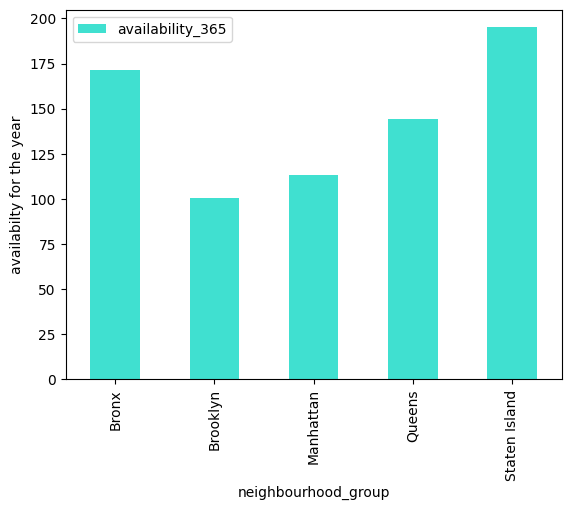

In [5]:
new_price=bnb[bnb['price']>=50]
new_price1=new_price.groupby(['neighbourhood_group'])['availability_365'].mean().reset_index()
new_price1.plot(kind='bar',x='neighbourhood_group',y='availability_365',color='turquoise')
plt.ylabel('availabilty for the year')
plt.show()



# 5.FIND THE TOP 5 NEIGHBOURHOODS WITH THE HIGHEST AVERAGE PRICE FOR EACH ROOM TYPE

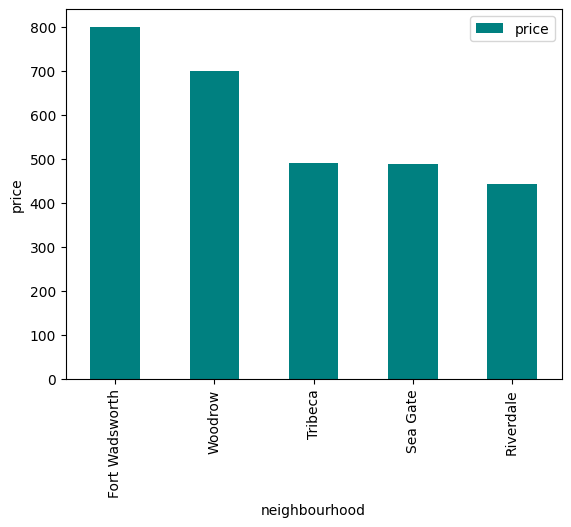

In [6]:
bnb1=bnb.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False).reset_index().head()
bnb1.plot(kind='bar',x='neighbourhood',y='price',color='teal')
plt.ylabel('price')
plt.show()


# 6.IDENTIFY HOSTS WHO HAVE MORE THAN ONE LISTING AND CALCULATE THEIR TOTAL AVAILABILITY


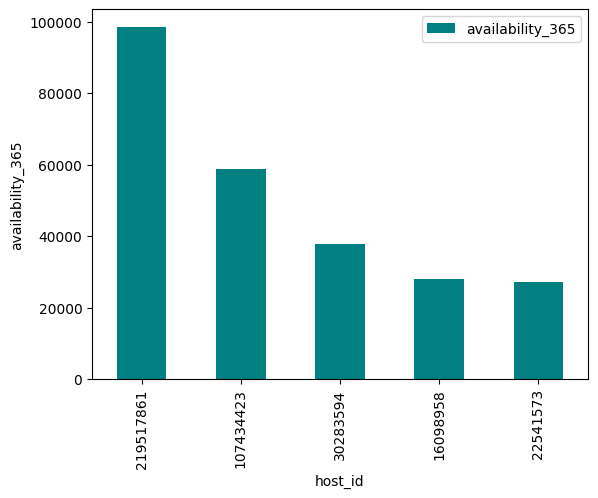

In [26]:
bnb1=bnb.groupby(['host_id'])['availability_365'].sum().sort_values(ascending=False).reset_index()
bnb1.head().plot(kind='bar',x='host_id',y='availability_365',color='teal')
plt.ylabel('availability_365')
plt.show()

# 7.WHICH ROOM TYPE HAS THE HIGHEST AVERAGE PRICE IN EACH BOROUGH?

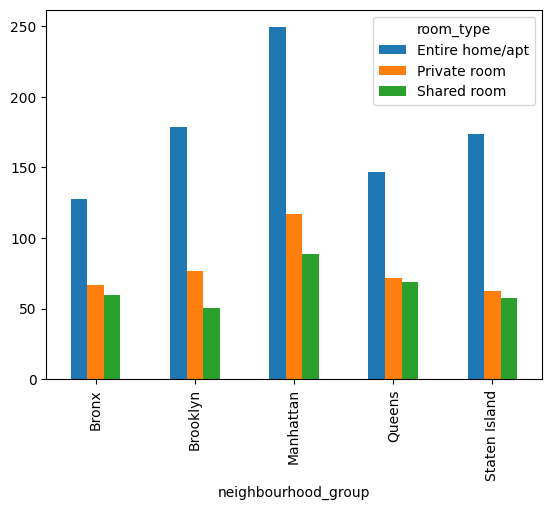

In [8]:
bnb1=bnb.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
bnb1.plot(kind='bar')
plt.show()

# 8.FIND OUT WHICH NEIGHBOURHOODS HAVE LISTINGS WITH EXTREME PRICES (ABOVE $1000) AND PLOT THEM ON A MAP

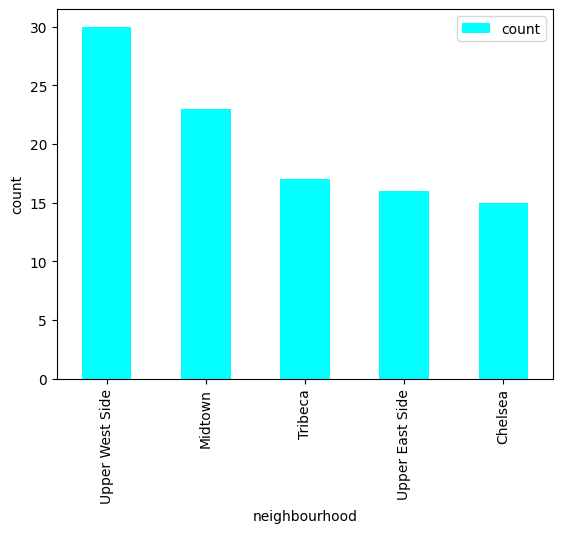

In [9]:
extreme_prices=bnb[bnb['price']>=1000]
extreme_prices1=extreme_prices.groupby(['neighbourhood']).size().sort_values(ascending=False).reset_index(name='count')
extreme_prices1.head().plot(kind='bar',x='neighbourhood',y='count',color='cyan')
plt.ylabel('count')
plt.show()

# 9.WHICH ROOM TYPE GETS THE MOST REVIEWS ON AVERAGE IN EACH BOROUGH?

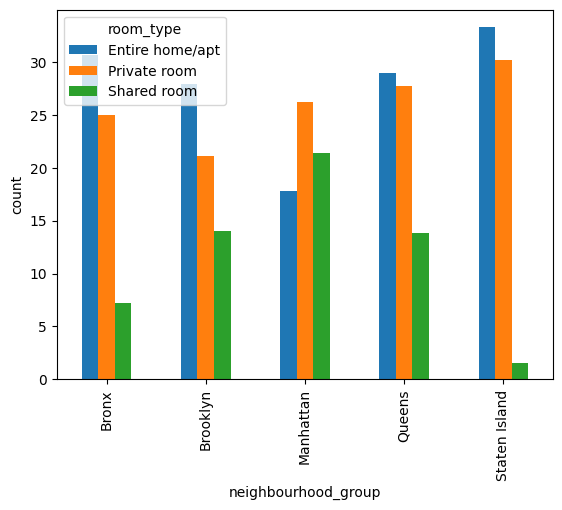

In [14]:
bnb_reviews=bnb.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].mean().unstack()
bnb_reviews.plot(kind='bar')
plt.ylabel('count')
plt.show()


# 10.FIND THE TOP 10 MOST REVIEWED LISTINGS AND CHECK THEIR AVAILABILITY

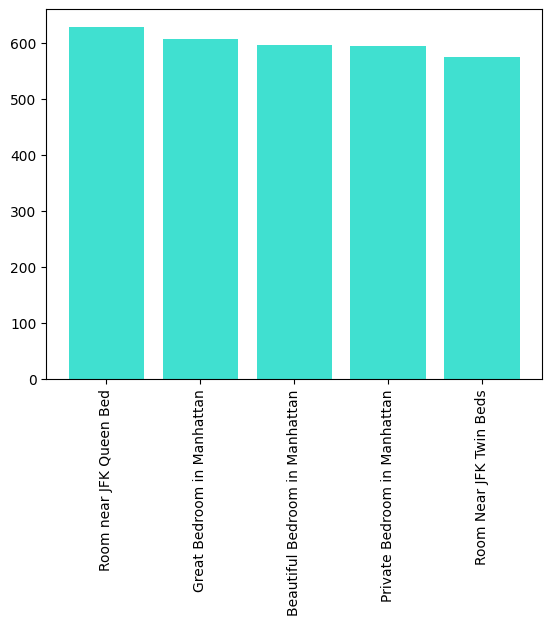

In [34]:
bnb1=bnb.sort_values(by='number_of_reviews',ascending=False).head()
plt.bar(bnb1['name'], bnb1['number_of_reviews'], color='turquoise')
plt.xticks(rotation=90)
plt.show()

# 11.WHICH HOSTS HAVE MORE THAN 10 LISTINGS, AND WHAT’S THEIR TOTAL AND AVERAGE AVAILABILITY?

      host_id          host_name  total_listings  total_availability_365  \
79  219517861       Sonder (NYC)             327                   98588   
54  107434423         Blueground             232                   58884   
34   30283594               Kara             121                   37924   
61  137358866             Kazuya             103                   20237   
24   16098958     Jeremy & Laura              96                   28063   
20   12243051             Sonder              96                   26555   
45   61391963  Corporate Housing              91                   22015   
30   22541573                Ken              87                   27159   
72  200380610            Pranjal              65                   21972   
5     1475015               Mike              52                   17374   

    avg_availability_365  
79            301.492355  
54            253.810345  
34            313.421488  
61            196.475728  
24            292.322917  
2

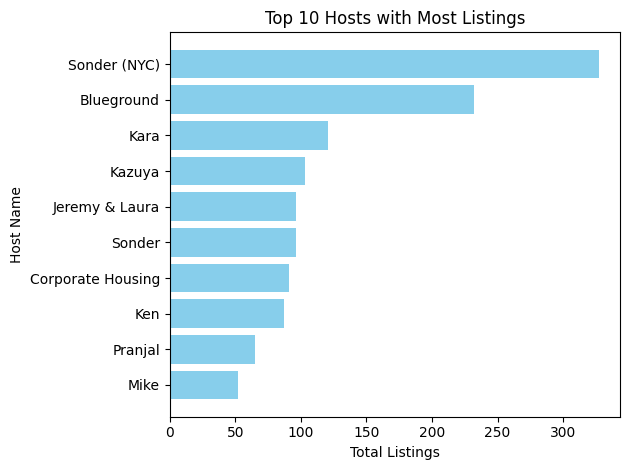

In [50]:
import pandas as pd

# Step 1: Count number of listings per host
host_listing_counts = bnb['host_id'].value_counts()
hosts_with_many_listings = host_listing_counts[host_listing_counts > 10].index

# Step 2: Filter the main DataFrame for those hosts
multi_listings = bnb[bnb['host_id'].isin(hosts_with_many_listings)]

# Step 3: Group by host_id and calculate total + average availability
host_availability = multi_listings.groupby(['host_id', 'host_name']).agg(
    total_listings=('id', 'count'),
    total_availability_365=('availability_365', 'sum'),
    avg_availability_365=('availability_365', 'mean')
).reset_index()

# Step 4: Sort and display top 10 hosts by total listings
top_hosts = host_availability.sort_values(by='total_listings', ascending=False).head(10)

print(top_hosts)
plt.barh(top_hosts['host_name'], top_hosts['total_listings'], color='skyblue')
plt.xlabel('Total Listings')
plt.ylabel('Host Name')
plt.title('Top 10 Hosts with Most Listings')
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()

# 12.FIND EXPENSIVE LISTINGS (PRICE > $500) THAT ARE AVAILABLE LESS THAN 30 DAYS A YEAR

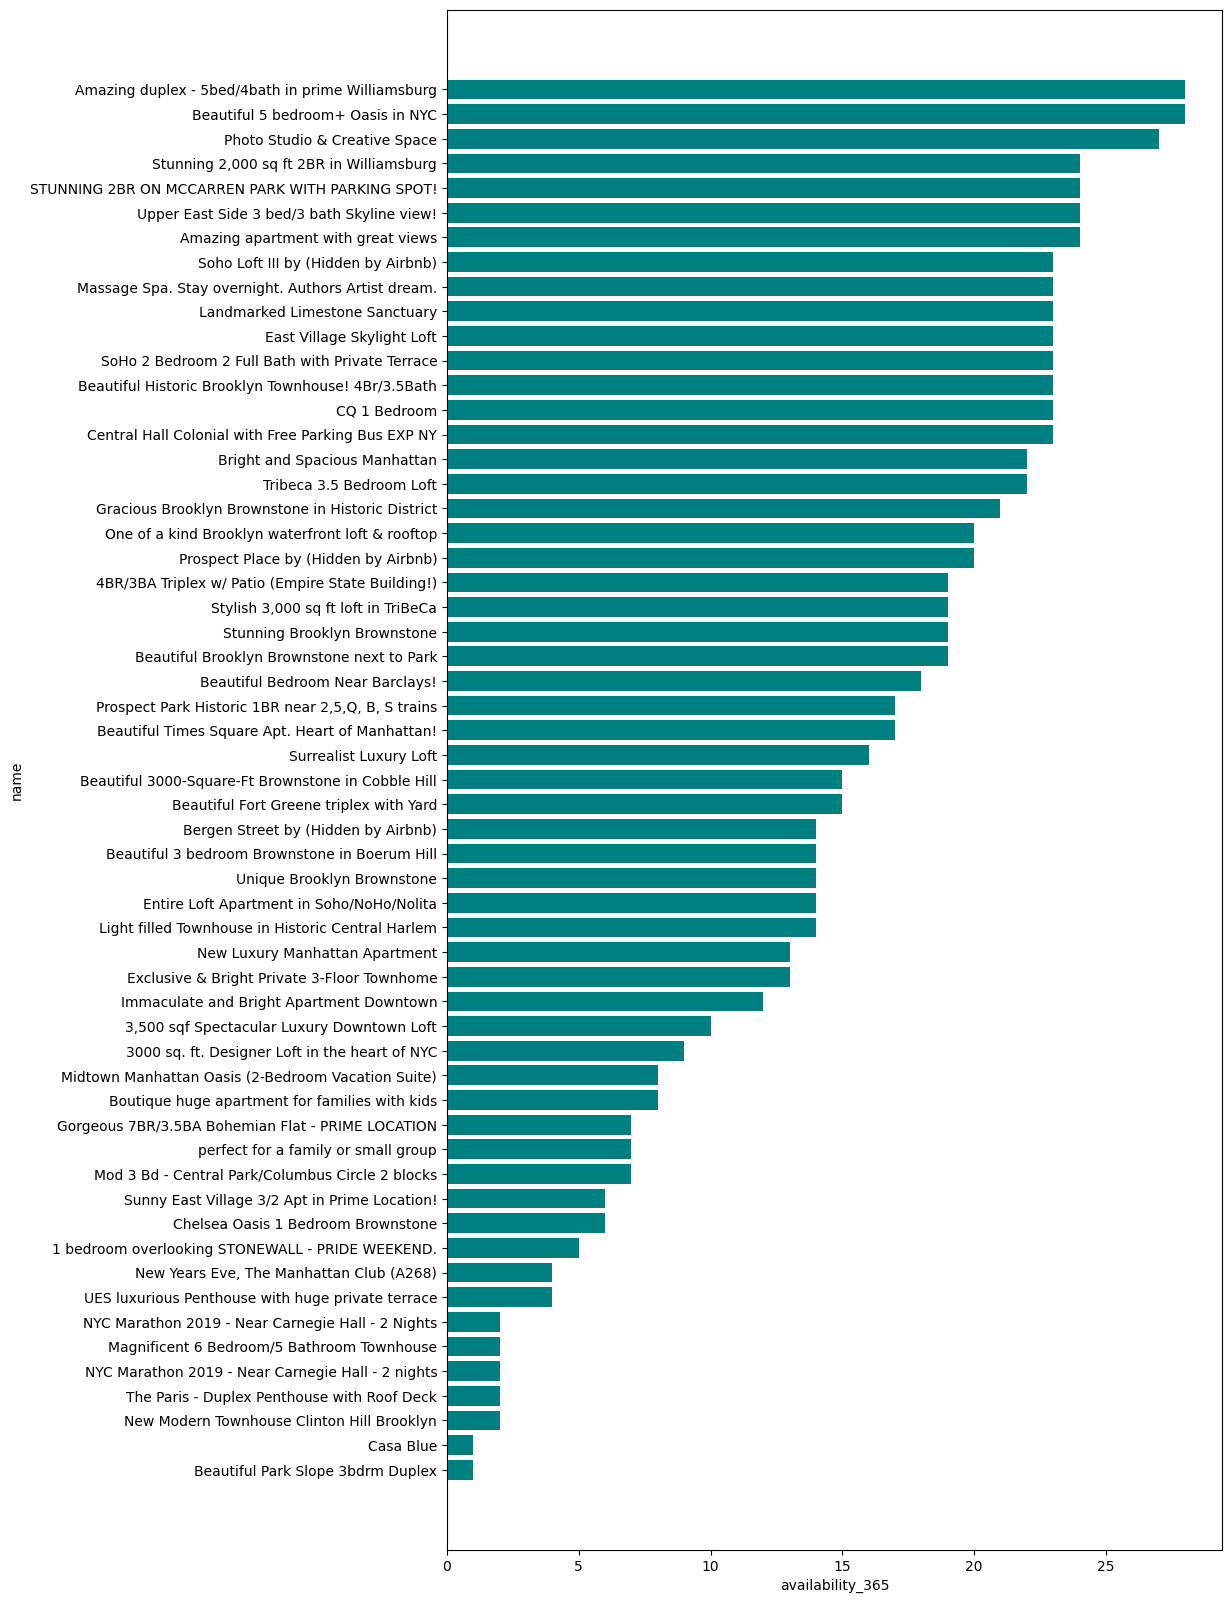

In [73]:
high_price=bnb[bnb['price']>500]
high_price1=high_price[(high_price['availability_365']!=0)&(high_price['availability_365']<=30)]
high_price2=high_price1.sort_values(by='availability_365')
high_price3=high_price2[['name','availability_365']]
plt.figure(figsize=(10,20))
plt.barh(high_price2['name'],high_price2['availability_365'],color='teal')
plt.ylabel('name')
plt.xlabel('availability_365')
plt.show()

# 13.IN EACH BOROUGH, WHICH NEIGHBOURHOOD HAS THE HIGHEST AVERAGE LISTING PRICE?

In [78]:
bnb.groupby(['neighbourhood_group'])

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood, dtype: int64

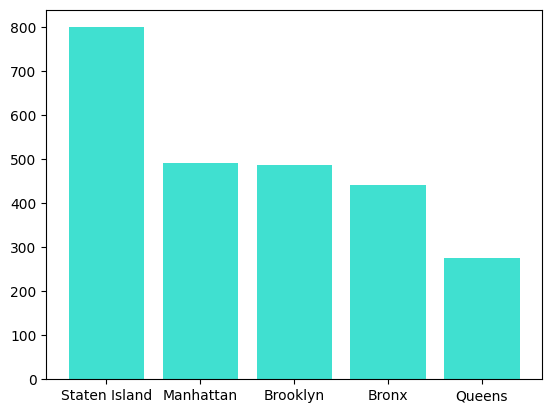

In [97]:
avg_price = bnb.groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean().reset_index()
avg_price
max_price=avg_price.loc[avg_price.groupby('neighbourhood_group')['price'].idxmax()]
max_price=max_price.sort_values(by='price',ascending=False)
plt.bar(max_price['neighbourhood_group'],max_price['price'],color='turquoise')
plt.show()


In [98]:
max_price

,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
121,Manhattan,Tribeca,490.638418
88,Brooklyn,Sea Gate,487.857143
34,Bronx,Riverdale,442.090909
163,Queens,Neponsit,274.666667


# 14.WHICH ROOM TYPE HAS THE HIGHEST PROPORTION OF LISTINGS AVAILABLE MORE THAN 300 DAYS A YEAR IN EACH BOROUGH?

   neighbourhood_group        room_type  high_count  total_count  \
13       Staten Island     Private room          84          188   
11              Queens      Shared room          84          198   
5             Brooklyn      Shared room         166          413   
1                Bronx     Private room         196          652   
8            Manhattan      Shared room         138          480   
2                Bronx      Shared room          17           60   
0                Bronx  Entire home/apt          95          379   
12       Staten Island  Entire home/apt          44          176   
10              Queens     Private room         832         3372   
9               Queens  Entire home/apt         395         2096   

    proportion_high_availability  
13                      0.446809  
11                      0.424242  
5                       0.401937  
1                       0.300613  
8                       0.287500  
2                       0.283333  
0     

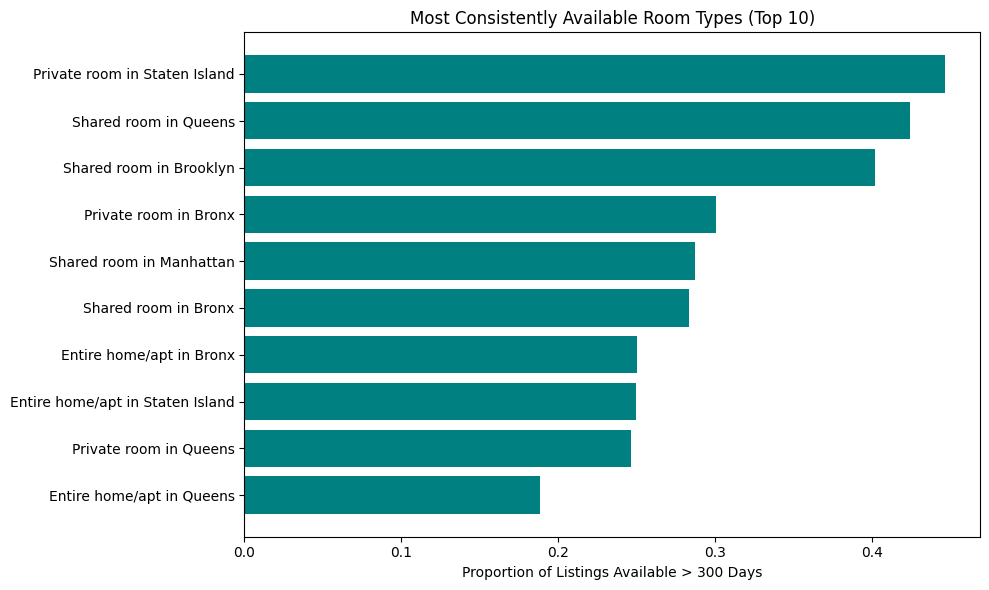

In [111]:
# Step 1: High availability listings
high_avail = bnb[bnb['availability_365'] > 300]

# Step 2: Count of high availability listings by borough and room type
high_avail_counts = high_avail.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='high_count')

# Step 3: Total listings by borough and room type
total_counts = bnb.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='total_count')

# Step 4: Merge and calculate proportion
merged = pd.merge(high_avail_counts, total_counts, on=['neighbourhood_group', 'room_type'])
merged['proportion_high_availability'] = merged['high_count'] / merged['total_count']

# Step 5: Show top results
print(merged.sort_values(by='proportion_high_availability', ascending=False).head(10))


# Plot highest availability proportions
plt.figure(figsize=(10,6))
top = merged.sort_values(by='proportion_high_availability', ascending=False).head(10)
plt.barh(top['room_type'] + ' in ' + top['neighbourhood_group'], top['proportion_high_availability'], color='teal')
plt.xlabel('Proportion of Listings Available > 300 Days')
plt.title('Most Consistently Available Room Types (Top 10)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# 15.WHICH NEIGHBOURHOODS HAVE THE MOST LISTINGS WITH MINIMUM_NIGHTS > 30?

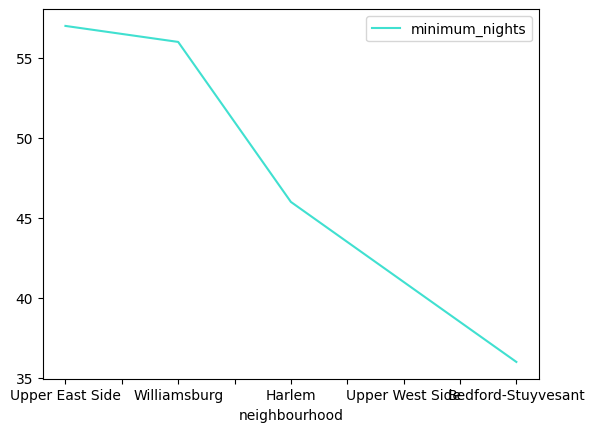

In [123]:
min_night=bnb[bnb['minimum_nights']>30]
min_night1=min_night.groupby('neighbourhood')['minimum_nights'].count().sort_values(ascending=False).reset_index()
min_night1.head().plot(kind='line',x='neighbourhood',y='minimum_nights',color='turquoise')
plt.show()

In [1]:
from IPython.display import Markdown, display

summary = """
# 🏙️ Airbnb NYC 2019 Dataset Analysis – Summary

## ✅ Dataset Info
- **Dataset**: NYC Airbnb Listings (`bnb`)
- **Key columns**: `price`, `room_type`, `neighbourhood`, `neighbourhood_group`, `availability_365`, `number_of_reviews`, `minimum_nights`, `host_id`

---

## 📌 Key Analyses Performed

### 1. Most Reviewed Listings
- Sorted by `number_of_reviews`
- Identified top 10 most reviewed listings
- Checked their `availability_365`

### 2. Expensive but Rare Listings
- Filtered listings where `price > $500` and `availability_365 < 30`
- Identified listings that are premium but barely available

### 3. Superhost Detection
- Found hosts with more than 10 listings
- Calculated total and average availability for those hosts

### 4. Costliest Neighbourhoods
- For each `neighbourhood_group`, found the `neighbourhood` with the highest average `price`

### 5. Review Distribution by Price Segment
- Compared average `number_of_reviews` between listings priced `< $100` and `> $500`

### 6. Room Type Availability
- Found room types most frequently available over 300 days/year in each borough
- Calculated and compared proportions

### 7. Long-Term Listing Zones
- Filtered listings with `minimum_nights > 30`
- Identified top neighbourhoods focused on long-term rentals

### 8. Correlation Matrix
- Analyzed relationships between `price`, `number_of_reviews`, `minimum_nights`, `availability_365`
- Visualized with a heatmap

---

## 🧼 Data Cleaning
- Removed rows with missing or inconsistent values
- Stripped extra spaces in `neighbourhood_group`
- Handled outliers in `price` and `minimum_nights`
- Converted data types where needed

---

## 📈 Visualizations Used
- Bar charts (horizontal & vertical)
- Heatmaps (correlation)
- Line and scatter plots
- Grouped bar charts for comparative insights

---

## ✅ Final Outcome
You have:
- Performed deep exploratory data analysis (EDA)
- Uncovered host behaviors, pricing patterns, and guest trends
- Used advanced filtering, grouping, and visual storytelling
- Built a solid analytical foundation for Airbnb business insights

🔥 Amazing work wrapping this up!
"""

display(Markdown(summary))



# 🏙️ Airbnb NYC 2019 Dataset Analysis – Summary

## ✅ Dataset Info
- **Dataset**: NYC Airbnb Listings (`bnb`)
- **Key columns**: `price`, `room_type`, `neighbourhood`, `neighbourhood_group`, `availability_365`, `number_of_reviews`, `minimum_nights`, `host_id`

---

## 📌 Key Analyses Performed

### 1. Most Reviewed Listings
- Sorted by `number_of_reviews`
- Identified top 10 most reviewed listings
- Checked their `availability_365`

### 2. Expensive but Rare Listings
- Filtered listings where `price > $500` and `availability_365 < 30`
- Identified listings that are premium but barely available

### 3. Superhost Detection
- Found hosts with more than 10 listings
- Calculated total and average availability for those hosts

### 4. Costliest Neighbourhoods
- For each `neighbourhood_group`, found the `neighbourhood` with the highest average `price`

### 5. Review Distribution by Price Segment
- Compared average `number_of_reviews` between listings priced `< $100` and `> $500`

### 6. Room Type Availability
- Found room types most frequently available over 300 days/year in each borough
- Calculated and compared proportions

### 7. Long-Term Listing Zones
- Filtered listings with `minimum_nights > 30`
- Identified top neighbourhoods focused on long-term rentals

### 8. Correlation Matrix
- Analyzed relationships between `price`, `number_of_reviews`, `minimum_nights`, `availability_365`
- Visualized with a heatmap

---

## 🧼 Data Cleaning
- Removed rows with missing or inconsistent values
- Stripped extra spaces in `neighbourhood_group`
- Handled outliers in `price` and `minimum_nights`
- Converted data types where needed

---

## 📈 Visualizations Used
- Bar charts (horizontal & vertical)
- Heatmaps (correlation)
- Line and scatter plots
- Grouped bar charts for comparative insights

---

## ✅ Final Outcome
You have:
- Performed deep exploratory data analysis (EDA)
- Uncovered host behaviors, pricing patterns, and guest trends
- Used advanced filtering, grouping, and visual storytelling
- Built a solid analytical foundation for Airbnb business insights

🔥 Amazing work wrapping this up!
